
# Задание:
----

<br>

Вам предоставлен анонимизированные результаты **реального A/B тестирования**, проходившего когда-то в нашем отделе (`ab_test_ensembles.csv`). В тесте было два варианта работы сервиса - `standard` и `svm_ensemble_v_1_22`, где работали несколько моделей классификации для целей сервиса.

<br>


------
Вам, как специалистам по машинному обучению предстоит ответить на **2 главных вопроса:**

1. Стоит ли нам оставить старый вариант работы сервиса или заменить его на вариант работы с моделями классификации (используем всю выборку 200к+ пользователей).
2. Кроме того, посчитайте вывод для типа пользователей (`user_type`). Стоит ли для новых (старых) пользователей оставить старый (новый) вариант работы сервиса.


<br>

Для того, чтобы освежить в памяти процесс тестирования статистических гипотез, непомню, что тестирование состоит из следующих частей:
1. Дизайн эксперимента.
2. Подготовка и запуск эксперимента.
3. Сбор данных и аналитика полученных данных.
4. Визуализация результатов тестирования.
5. Тестирование гипотез.
6. Вывод и интерпритация результатов.

-----

#### Критерии оценки задания:

1. **Первое, что будет проверяться - вывод полученных результатов**, в случае если выводы сделаны не правильно, задание считается проваленным и на этом этап проверки заканчивается (пропускаются этапы код-ревью, оформления и визуализации, качество кода).
2. В случае если результаты и интерпритация результатов оказались верны, проводится код-ревью и проверка этапа визуализаций, поиск проблемных точек, точек роста.
3. **Максимальный балл** который можно получить, выполнив текущее задание: **2 балла за 1 вопрос, 2 балла за 2 вопрос и 1 балл за эффективный и аккуратный код.


Удачи, примените все свои навыки, которые вам доступны на данный момент и покажите на что вы способны!

In [298]:
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")
np.random.seed(42)

<div align="center"> <font size="5"> <b>A/B testing all data</b> </div>

In [299]:
data = pd.read_csv('ab_test_ensembles.csv')

In [300]:
data.head()

,user_id,timestamp,group,variants,converted,location,age_group,user_type
0,9109b0dc-d393-497f-8d63-ba9a25dd16b4,2022-05-21 22:11:48.556739,control,standard,0,United Kingdom,18-25,registered_user
1,2430c3d2-f75b-4b31-8271-51b6a76c2652,2022-05-12 08:01:45.159739,control,standard,0,United Kingdom,42-49,registered_user
2,44788c4e-8dd2-4fad-b986-75e76f4adb64,2022-05-11 16:55:06.154213,treatment,svm_ensemble_v_1_22,0,United Kingdom,26-33,new_user
3,4699a417-506d-41b8-a354-6af6ad576963,2022-05-08 18:28:03.143765,treatment,svm_ensemble_v_1_22,0,United Kingdom,42-49,registered_user
4,304b0d28-bcdf-401a-9dff-66230d3ba0bc,2022-05-21 01:52:26.210827,control,standard,1,United Kingdom,42-49,registered_user


In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    294478 non-null  object
 1   timestamp  294478 non-null  object
 2   group      294478 non-null  object
 3   variants   294478 non-null  object
 4   converted  294478 non-null  int64 
 5   location   294478 non-null  object
 6   age_group  294478 non-null  object
 7   user_type  294478 non-null  object
dtypes: int64(1), object(7)
memory usage: 18.0+ MB


In [302]:
data.dtypes

user_id      object
timestamp    object
group        object
variants     object
converted     int64
location     object
age_group    object
user_type    object
dtype: object

In [303]:
data.columns

Index(['user_id', 'timestamp', 'group', 'variants', 'converted', 'location',
       'age_group', 'user_type'],
      dtype='object')

In [304]:
data['timestamp']=pd.to_datetime(data['timestamp'])

In [305]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
timestamp,294478,2022-05-13 13:40:10.474213120,2022-05-02 13:42:05.378582,2022-05-08 02:06:48.649925120,2022-05-13 13:21:07.016475904,2022-05-19 01:43:51.611873792,2022-05-24 13:41:54.460509,NaN
converted,294478.0,0.119659,0.0,0.0,0.0,0.0,1.0,0.324563


In [306]:
data.isnull().sum()

user_id      0
timestamp    0
group        0
variants     0
converted    0
location     0
age_group    0
user_type    0
dtype: int64

In [329]:
data[(data['variants'] == 'standard') & (data['group']!='control')]

,user_id,timestamp,group,variants,converted,location,age_group,user_type


In [308]:
data.loc[(data['variants'] == 'standard') & (data['group']!='control'),'group'] = 'control'

In [328]:
data[(data['variants'] == 'svm_ensemble_v_1_22')&(data['group']!='treatment')]

,user_id,timestamp,group,variants,converted,location,age_group,user_type


In [327]:
data.loc[(data['variants'] == 'svm_ensemble_v_1_22')&(data['group']!='treatment'),'group'] = 'treatment'

In [311]:
data[['variants']].value_counts()

variants           
standard               147239
svm_ensemble_v_1_22    147239
Name: count, dtype: int64

In [312]:
data[['group']].value_counts()

group    
control      147239
treatment    147239
Name: count, dtype: int64

In [313]:
data['converted'].value_counts()

converted
0    259241
1     35237
Name: count, dtype: int64

In [314]:
data['user_type'].value_counts(normalize=True)

user_type
registered_user    0.500003
new_user           0.499997
Name: proportion, dtype: float64

In [315]:
pd.pivot_table(data,index=['user_type','variants'],values='converted',aggfunc=np.mean)

converted
user_type       variants                      
new_user        standard              0.121075
                svm_ensemble_v_1_22   0.117223
registered_user standard              0.119877
                svm_ensemble_v_1_22   0.120450

In [316]:
data.groupby('variants')['converted'].agg(['sum','mean','median','max','min'])


,sum,mean,median,max,min
variants,,,,,
standard,17739,0.120478,0.0,1,0
svm_ensemble_v_1_22,17498,0.118841,0.0,1,0


- The data is distributed evenly between Sample A and B

- The mean converted values for A - 0.12 and for B - 0.118

((array([-4.57741243, -4.38824339, -4.2856733 , ...,  4.2856733 ,
          4.38824339,  4.57741243]),
  array([0, 0, 0, ..., 1, 1, 1])),
 (0.19964378104848943, 0.11965919355605509, 0.6151064839133327))

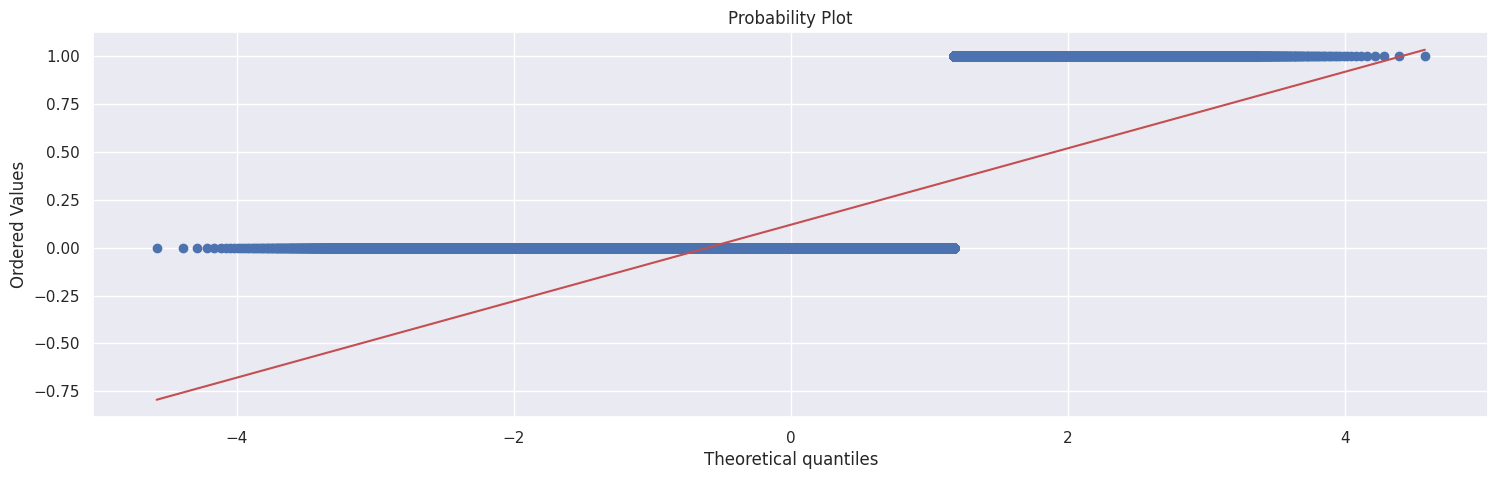

In [317]:
import pylab
probplot(data['converted'], dist='norm', plot=pylab)

<Axes: >

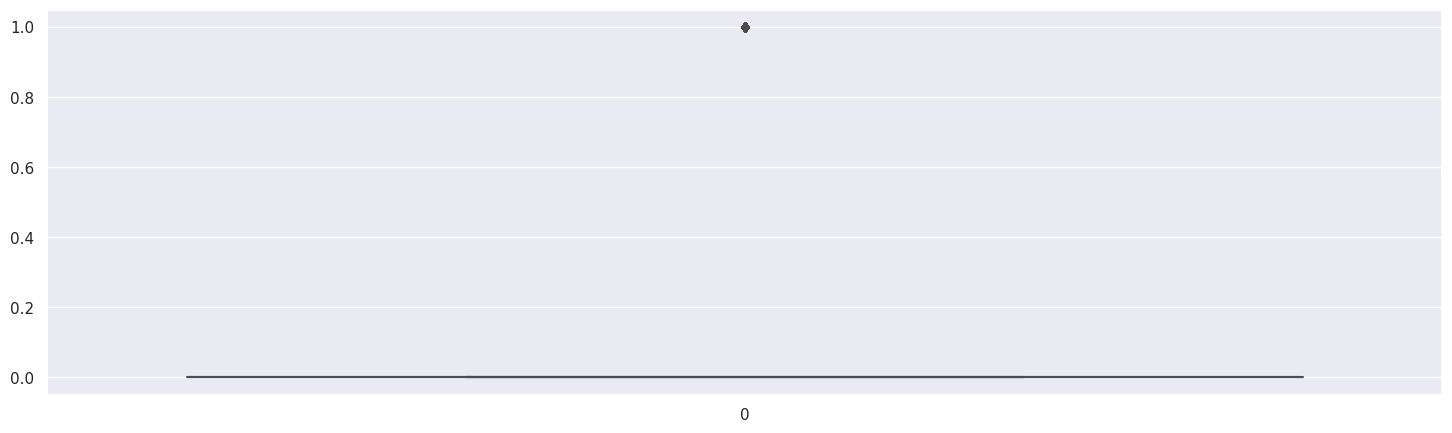

In [318]:
sns.boxplot(data['converted'])

<Axes: xlabel='converted', ylabel='Density'>

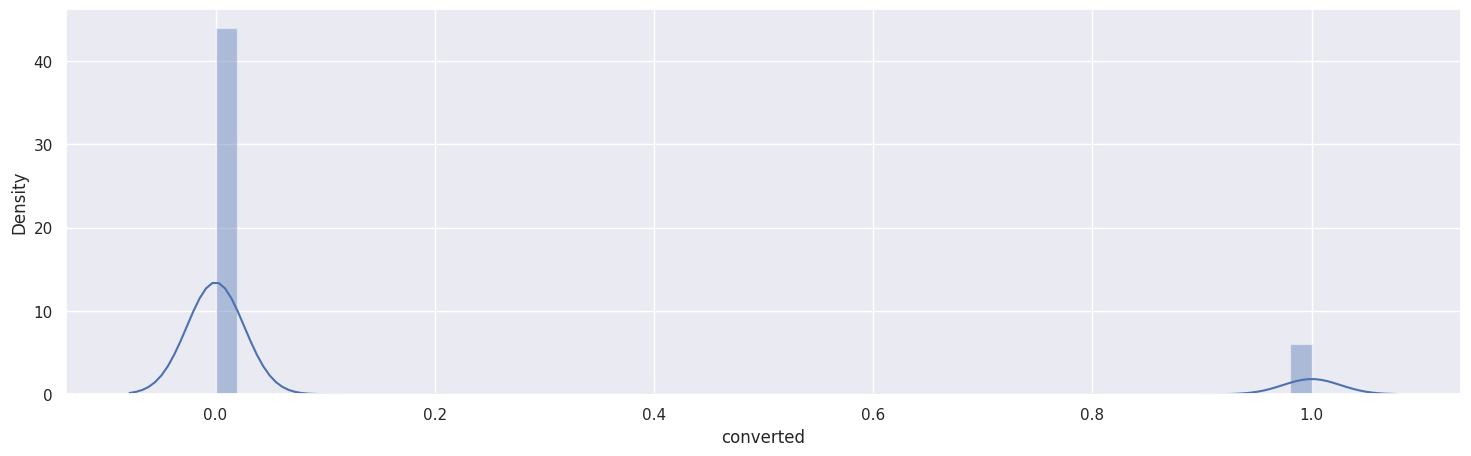

In [319]:
sns.distplot(data['converted'])

In [321]:
from scipy.stats import kstest

def k_stest(data):
  stat, p = kstest(data,'norm')
  print('Stat = %.3f, p = %.3f\n' %(stat, p ))
  if p >0.05:
    print("Probably Gaussian")
  else:
    print("Probably Not Gaussian\n")

k_stest(data['converted'])

Stat = 0.500, p = 0.000

Probably Not Gaussian



<b>The data takes discrete values. Statistical tests and visualization also showed a non-Gaussian distribution</b>

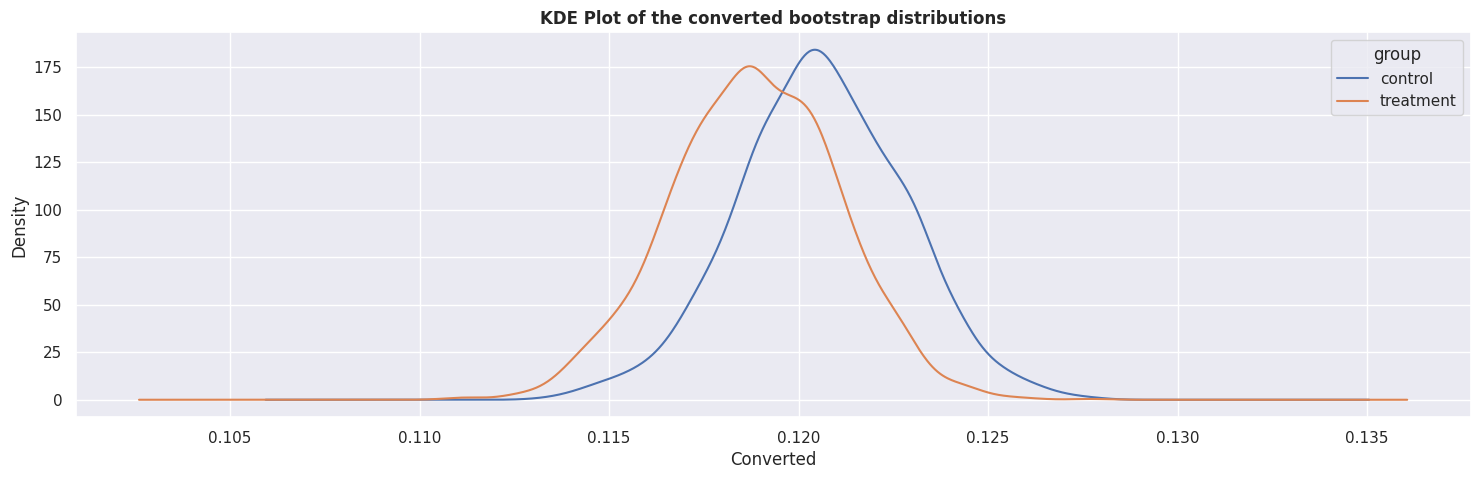

In [322]:
n = 2000

bootstrap_sum = pd.DataFrame([data.sample(frac=0.15, replace=True).groupby('group')['converted'].mean() for i in range(n)])

bootstrap_sum.plot.kde()
sns.set(rc={'figure.figsize':(18,5)})
plt.title("KDE Plot of the converted bootstrap distributions", fontweight="bold")
plt.xlabel("Converted")
plt.show()

In [330]:
bootstrap_sum['diff_mean'] = bootstrap_sum['treatment'] - bootstrap_sum['control']
mean_pos_count = len(bootstrap_sum[bootstrap_sum['diff_mean'] > 0])
p_mean_diff = mean_pos_count/n
p_mean_diff

0.286

In [331]:
alpha = 0.05
z_mean = np.mean(bootstrap_sum['treatment'])- np.mean(bootstrap_sum['control'])
z_sigma = np.sqrt((np.var(bootstrap_sum['treatment'])/n + np.var(bootstrap_sum['control'])/n))
print("Mean of (treatment - control):\t\t", z_mean)
print("Standard Error of (treatment -  control):", z_sigma)
print("CI of (treatment - control):\t\t", [z_mean - norm.ppf(1-alpha/2)*z_sigma, z_mean + norm.ppf(1-alpha/2)*z_sigma] )

Mean of (treatment - control):		 -0.0017491848297594564
Standard Error of (treatment -  control): 7.011102029591093e-05
CI of (treatment - control):		 [-0.0018865999044587985, -0.0016117697550601144]


In [332]:
np.percentile(bootstrap_sum['diff_mean'], [2.5, 97.5])

array([-0.00784314,  0.00447715])

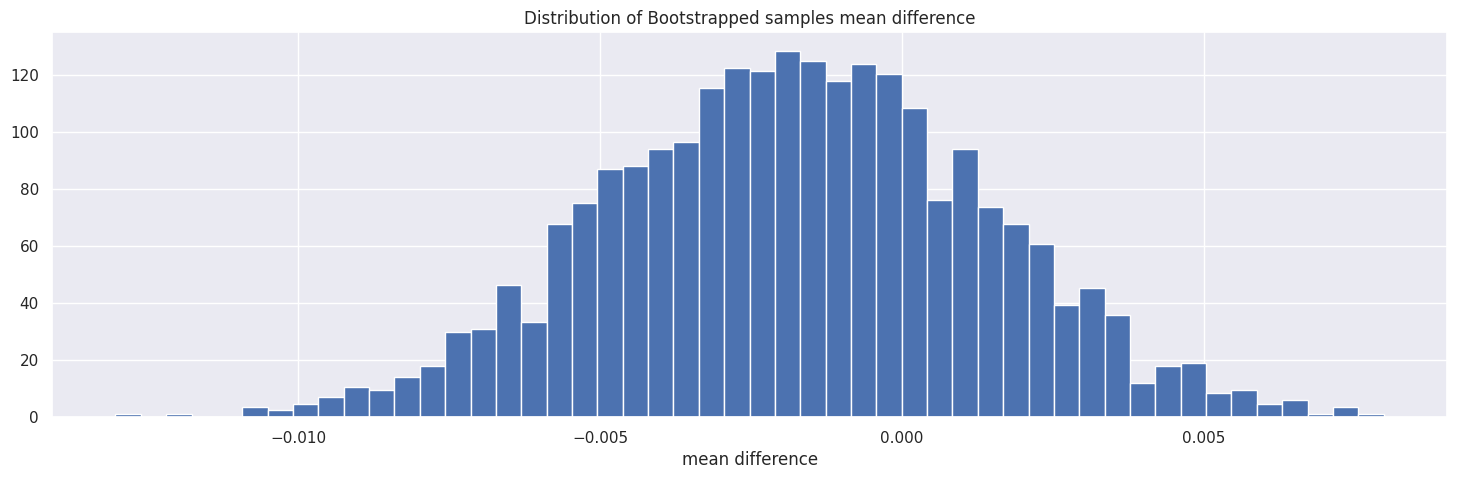

In [333]:
counts,bins,ignored = plt.hist(bootstrap_sum['diff_mean'],50,density = True)
plt.xlabel("mean difference")
plt.title("Distribution of Bootstrapped samples mean difference")
plt.show()

In [334]:
"""
Distribution of new users by control and treatment
"""
data[data['user_type'] == 'new_user'].groupby('group')['converted'].sum()/data[data['user_type'] == 'new_user'].groupby('group')['converted'].count()*100

group
control      12.107538
treatment    11.722335
Name: converted, dtype: float64

In [335]:
"""
Distribution of registered_user users by control and treatment
"""
data[data['user_type'] == 'registered_user'].groupby('group')['converted'].sum()/data[data['user_type'] == 'registered_user'].groupby('group')['converted'].count()*100

group
control      11.987691
treatment    12.045042
Name: converted, dtype: float64

In [336]:
pd.pivot_table(data[data['user_type'] == 'new_user'],index ='group',values='converted',aggfunc = np.mean)

,converted
group,
control,0.121075
treatment,0.117223


In [337]:
pd.pivot_table(data[data['user_type'] == 'registered_user'],index ='group',values='converted',aggfunc = np.mean)

,converted
group,
control,0.119877
treatment,0.120450


- For new users in control group , the value is higher than in treatment group 
- Аor registered users, on the contrary, the treatment value is better than the control value

In [338]:
from scipy.stats import chi2_contingency

def chi2_con_test(data):
    chi2, p, dof, ex = chi2_contingency(data)
    alpha = 0.05

    print('p=%.4f , alpha=%.2f '%(p,alpha))
    if p > alpha:
        print('Two verisions have no significant difference')
    else:
        print('Two verisions have a significant difference')

In [339]:
data_all = pd.crosstab(data['group'],data['converted'])
data_new = pd.crosstab(data[data['user_type'] == 'new_user']['group'],data[data['user_type'] == 'new_user']['converted'])
data_registered = pd.crosstab(data[data['user_type'] == 'registered_user']['group'],data[data['user_type'] == 'registered_user']['converted'])

In [340]:
print('For all users')
chi2_con_test(data_all)

print('\nFor new users')
chi2_con_test(data_new)

print('\nFor registered users')
chi2_con_test(data_registered)

For all users
p=0.1730 , alpha=0.05 
Two verisions have no significant difference

For new users
p=0.0230 , alpha=0.05 
Two verisions have a significant difference

For registered users
p=0.7411 , alpha=0.05 
Two verisions have no significant difference


- Both variants have no statistical significance for all users and for registered users
- Both variants have statistical significance for new users. In the treatment options, the value has worsened and the changes have had a negative effect. It is necessary to eliminate the changes and revert to the previous version.